In [41]:
import numpy as np
import matplotlib
from matplotlib import pyplot as pl

1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [ ]:
#binary to deciaml
def bin_todec(x_bin):
    x = str(x_bin)
    sz = len(x)
    val = 0
    for i in range(sz):
        if x[i] != '1' and x[i] != '0': 
            print("Error:", x[i], "is not 0 or 1")
            break
        val += int(x[i])*2**(sz-i-1)
    return val
print(bin_todec(10010))

18


In [ ]:
#deciaml to binary
def ms_bit(x_dec): # most significant bit  ex: ms_bit(7) = 100
    N = 0
    while True:
        if x_dec < 2**N: break
        else: N += 1
    return 10**(N-1)

def dec_tobin(x_dec):
    value = 0
    temp = x_dec
    while temp != 0:
        value += ms_bit(temp)
        temp -= bin_todec(ms_bit(temp))
    return value

print(dec_tobin(17))


10001


In [122]:
#hexadeciaml to decimal
cnvrt = {"0":0, "1":1, "2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "A":10, "B":11, "C":12, "D":13, "E":14, "F":15}
def hex_todec(x_hex):
    sz = len(x_hex)
    value = 0
    for i in range(sz):
        value += cnvrt[x_hex[i]]*16**(sz-i-1)
    return value
print(hex_todec("100"))


256


In [ ]:
#decimal to hexadecimal
def ms_digit(x_dec): # most significant bit  ex: ms_digit(21) = 10
    N = 0
    while True:
        if x_dec < 16**N: break
        else: N += 1
    return 10**(N-1)

def dec_tohex(x_dec):
    value = 0
    temp = x_dec
    while temp != 0:
        value += ms_digit(temp)
        temp -= hex_todec(str(ms_digit(temp)))
    return value

print(dec_tohex(29))

23


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [84]:
def float_32(word):
    if len(word) != 32: 
        print("Given word has not 32 bit")
        return 0
    sgn =  int(word[0])
    exp = word[1:9]
    mnt = word[9:]
    
    fract = 1
    j = 1
    for bit in mnt: 
        fract += int(bit)*2**-j
        j += 1

    power = 2**(bin_todec(int(exp)) - 127)

    val = (-1)**sgn * fract * power
    return val

float_32("01100000001000001000010000000000")


4.6265478971977105e+19

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [14]:
def quadratic(a, b, c):
    val = [(-b + np.sqrt(b**2 - 4*a*c))/(2*a), (-b - np.sqrt(b**2 - 4*a*c))/(2*a)]
    return val

In [17]:
# a
print(quadratic(0.001, 1000, 0.001))

[-9.999894245993346e-07, -999999.999999]


In [16]:
# b
def quadratic2(a, b, c):
    val = [(4*a*c)/(2*a * (-b - np.sqrt(b**2 - 4*a*c))), (4*a*c)/(2*a * (-b + np.sqrt(b**2 - 4*a*c)))]
    return val
print(quadratic2(0.001, 1000, 0.001))

[-1.0000000000009999e-06, -1000010.5755125057]


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [25]:
# a
def f(x): return x*(x-1)
def Df_(x, delta):
    val = (f(x + delta) - f(x))/delta
    return val
def Df(x): return 2*x - 1

print("Definition: f'(1) =", Df_(1, 10**-2))
print("Analitical: f'(1) =", Df(1))
#Value are different because delta is not close enough to 0

Definition: f'(1) = 1.010000000000001
Analitical: f'(1) = 1


In [33]:
deltas = [10**-m for m in range(4, 14)]
print("Analitical: f'(1) =", Df(1))
for d in deltas:
    print("Definition: f'(1) =", Df_(1, d), "with delta = ", d)
    print("Error:", abs(Df(1) - Df_(1, d))/100, "%")


Analitical: f'(1) = 1
Definition: f'(1) = 1.0000999999998899 with delta =  0.0001
Error: 9.999999988985486e-07 %
Definition: f'(1) = 1.0000100000065513 with delta =  1e-05
Error: 1.0000006551269535e-07 %
Definition: f'(1) = 1.0000009999177333 with delta =  1e-06
Error: 9.999177332797871e-09 %
Definition: f'(1) = 1.0000001005838672 with delta =  1e-07
Error: 1.005838672352155e-09 %
Definition: f'(1) = 1.0000000039225287 with delta =  1e-08
Error: 3.9225287462585354e-11 %
Definition: f'(1) = 1.000000083740371 with delta =  1e-09
Error: 8.374037108183075e-10 %
Definition: f'(1) = 1.000000082840371 with delta =  1e-10
Error: 8.284037100736441e-10 %
Definition: f'(1) = 1.000000082750371 with delta =  1e-11
Error: 8.275037099991778e-10 %
Definition: f'(1) = 1.0000889005833413 with delta =  1e-12
Error: 8.890058334132256e-07 %
Definition: f'(1) = 0.9992007221627407 with delta =  1e-13
Error: 7.992778372593045e-06 %


7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice. We can rewrite $I$ as
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} \frac{2}{N} \sqrt(1 - (\frac{2}{N}(K - \frac{N}{2}))^2) =
 \lim_{N\to\infty} \sum_{k=1}^{N} \frac{2}{N} \sqrt(1 - (\frac{2}{N}K - 1)^2)
$$
(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [ ]:
# a 
N = 100
def integral(N):
    S = 0
    for i in range(N):
        S += (2/N)*np.sqrt(1 - (2*i/N - 1)**2)
    return S
print("Result:", integral(100))

Result:  1.5691342555492505


In [51]:
# b
N = [10**k for k in range(1,6)]
err = []
print("Analitical: ", np.pi/2)
for k in N:
    print("Result:", integral(k), "for N =", k)
    print("Error:", abs(np.pi/2 - integral(k))/100)
    err.append(abs(np.pi/2 - integral(k))/100)

Analitical:  1.5707963267948966
Result: 1.5185244144417758 for N = 10
Error: 0.0005227191235312079
Result: 1.5691342555492505 for N = 100
Error: 1.6620712456461018e-05
Result: 1.570743738501071 for N = 1000
Error: 5.258829382559504e-07
Result: 1.5707946637152914 for N = 10000
Error: 1.6630796051408937e-08
Result: 1.5707962742034225 for N = 100000
Error: 5.259147406455611e-10


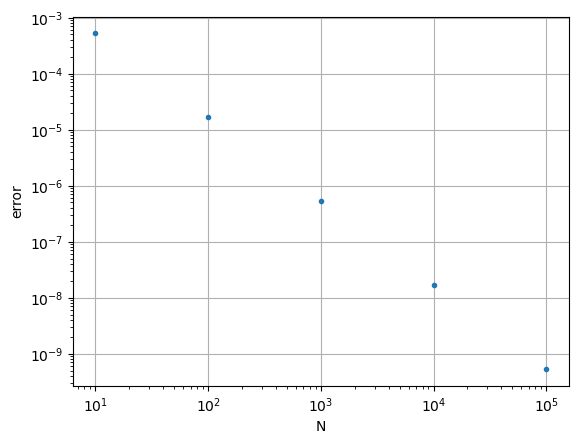

In [52]:
pl.plot(N, err, '.')
pl.xlabel("N")
pl.grid()
pl.ylabel("error")
pl.xscale("log")
pl.yscale("log")
pl.show()